### 다중회귀분석
- 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우
- 종속 변수 Y, 독립 변수 X 
- Y = b + a1X1 + a2X2 + ... + anXn 

In [1]:
### 데이터 준비
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

path = '../data/auto-mpg.csv'
df = pd.read_csv(path, header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model year', 'origin', 'name']

df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X = ndf[['weight']] # 독립 변수 X
Y = ndf['mpg']      # 종속 변수 Y 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 10)

print('train data : ', X_train.shape)
print('test data : ', X_test.shape)                                                            

train data :  (274, 1)
test data :  (118, 1)


### 모형 학습 및 검증
- LinearRegression() 함수를 사용하여 객체 생성 : lr 
- fit() 메소드로 객체 학습 

In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

print('X 변수의 개수 a : ', lr.coef_)
print('\n')

print('상수항 b : ', lr.intercept_)

0.6822458558299325


X 변수의 개수 a :  [-0.00775343]


상수항 b :  46.7103662572801


### 모형 예측 결과 비교 
- predict() 메소드 사용

c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


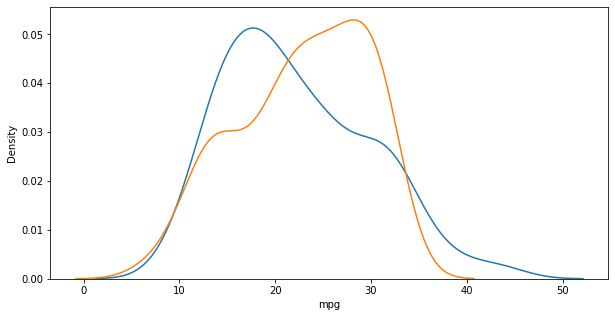

In [4]:
y_hat = lr.predict(X_test)

plt.figure(figsize = (10, 5)) 
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat', ax = ax1)
plt.show()
plt.close()